# Preprocessing Data

##Import Library

melakukan import librarry untuk persiapan praproses data

In [115]:
import numpy as np
import sklearn.metrics as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy import stats
import pyarrow as pa
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

##Load Dataset

In [116]:
# Melakukan Load dataset
ntt = pd.read_csv('https://raw.githubusercontent.com/Arin1206/datasetFPKel10/main/NTT%202015%20-%202022.csv')
ntt.head(10)

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247
5,6/1/2014,39.1,9271
6,7/1/2014,41911.0,9348
7,8/1/2014,44722.0,9378
8,9/1/2014,47533.0,9400
9,10/1/2014,50344.0,9495


##Display Data Type Information

In [117]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            108 non-null    object 
 1   total_visitor       108 non-null    float64
 2   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


## Data Duplicate Check

In [118]:
jumlah_baris_duplikat = ntt.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


##Missing Values Check

In [119]:
ntt.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

Didapatkan dari dataset terdapat 0 baris missing value

## Data Type Adjustment

### Change the float data type to integer

In [120]:
# Mengubah kolom 'total visitor' dari float menjadi integer
ntt['total_visitor'] = ntt['total_visitor'].astype(int)

In [121]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


### Datetime Formatting

In [122]:
ntt['datetime'] = pd.to_datetime(ntt['datetime'], format='%m/%d/%Y')
ntt = ntt.set_index('datetime')
ntt.head()

,total_visitor,total_accomodation
datetime,,
2014-01-01,22881,9024
2014-02-01,19794,9058
2014-03-01,26642,9103
2014-04-01,33478,9187
2014-05-01,36289,9247


In [123]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_visitor       108 non-null    int64
 1   total_accomodation  108 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


## Outlier Values Check

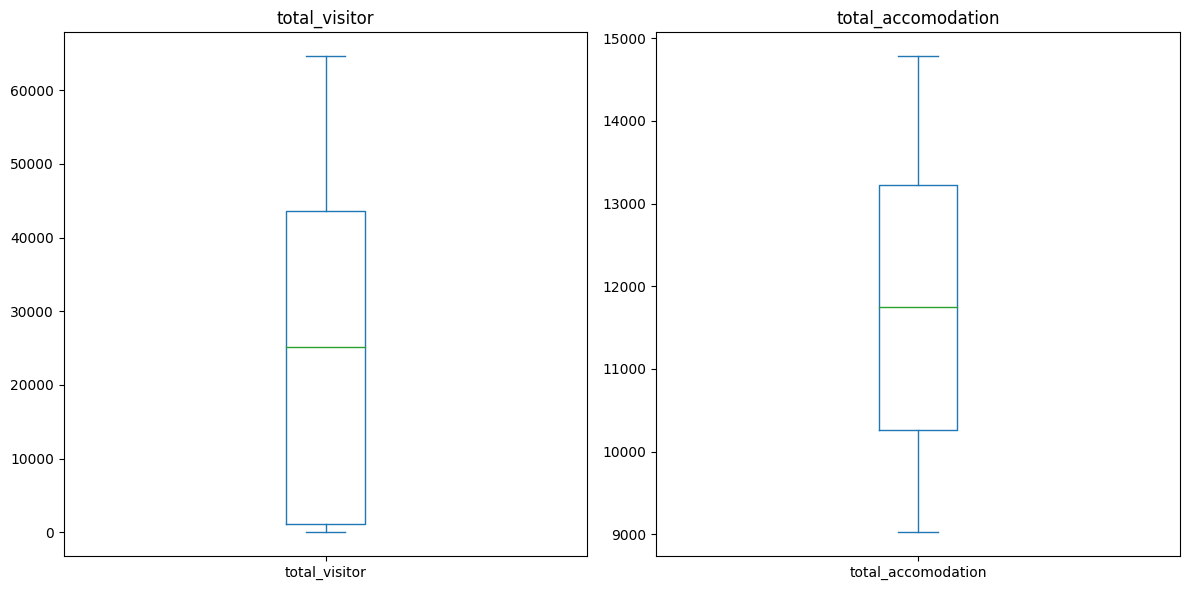

In [124]:
data_check = ['total_visitor', 'total_accomodation']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for i, data in enumerate(data_check):
    ntt[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)
plt.tight_layout()
plt.show()

In [125]:
Q1 = ntt[['total_visitor', 'total_accomodation']].quantile(0.25)
Q3 = ntt[['total_visitor', 'total_accomodation']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ntt[((ntt[['total_visitor', 'total_accomodation']] < lower_bound) | (ntt[['total_visitor', 'total_accomodation']] > upper_bound)).any(axis=1)]

print("Baris dengan outlier:")
print(outliers)

Baris dengan outlier:
Empty DataFrame
Columns: [total_visitor, total_accomodation]
Index: []




```
`# This is formatted as code`
```

## Normalisasi dataset

In [126]:
# Normalize the data
scaler = MinMaxScaler()
dataset_scaled = ntt.copy()
for column in ntt.columns:
  dataset_scaled[[column]] = scaler.fit_transform(ntt[[column]])

In [127]:
dataset_scaled

,total_visitor,total_accomodation
datetime,,
2014-01-01,0.353981,0.000000
2014-02-01,0.306224,0.005905
2014-03-01,0.412166,0.013720
2014-04-01,0.517923,0.028308
2014-05-01,0.561410,0.038729
...,...,...
2022-08-01,0.048268,0.958145
2022-09-01,0.041337,0.964050
2022-10-01,0.040935,0.965960


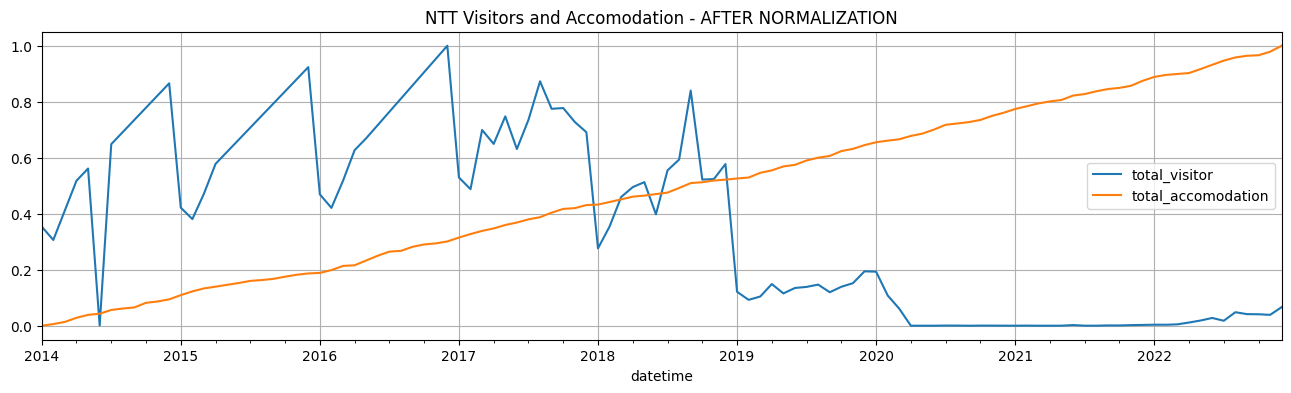

In [128]:
# Plot Time Series Dataset
dataset_scaled.plot(figsize=(16,4), legend = True , grid=True)
plt.title('NTT Visitors and Accomodation - AFTER NORMALIZATION')
plt.show()

## Make Time Series Sequence

In [129]:
# Define sequence length and features
sequence_length = 6  # Number of time steps in each sequence
num_features = len(dataset_scaled.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(dataset_scaled) - sequence_length):
    # Mendapatkan 5 data periode sebelumnya
    seq = dataset_scaled.iloc[i:i+sequence_length]
    # Mendapatkan data periode ke-6 sebagai label, cuma kolom total_visitor
    label = dataset_scaled.iloc[i+sequence_length, 1]  # '_tempm' column index, kalau prediksi lebih dari satu, ganti angkanya
    sequences.append(seq)
    labels.append(label)

In [130]:
sequences

[            total_visitor  total_accomodation
 datetime                                     
 2014-01-01       0.353981            0.000000
 2014-02-01       0.306224            0.005905
 2014-03-01       0.412166            0.013720
 2014-04-01       0.517923            0.028308
 2014-05-01       0.561410            0.038729
 2014-06-01       0.000603            0.042897,
             total_visitor  total_accomodation
 datetime                                     
 2014-02-01       0.306224            0.005905
 2014-03-01       0.412166            0.013720
 2014-04-01       0.517923            0.028308
 2014-05-01       0.561410            0.038729
 2014-06-01       0.000603            0.042897
 2014-07-01       0.648386            0.056270,
             total_visitor  total_accomodation
 datetime                                     
 2014-03-01       0.412166            0.013720
 2014-04-01       0.517923            0.028308
 2014-05-01       0.561410            0.038729
 2014-06-01

In [131]:
labels

[0.05626953803403967,
 0.06147968044459873,
 0.06530045154567565,
 0.08179923584577975,
 0.08666203542896844,
 0.09412990621743655,
 0.1092393192080583,
 0.12261201806182709,
 0.13320597429663072,
 0.13945814518930177,
 0.1460576589093434,
 0.15248350121569998,
 0.16012504341785339,
 0.16307745745050362,
 0.1674192427926362,
 0.17523445640847513,
 0.18200764154220206,
 0.18669676971170546,
 0.18860715526224392,
 0.19868009725599167,
 0.21361583883292812,
 0.21587356721083717,
 0.23306703716568244,
 0.25008683570684265,
 0.2646752344564085,
 0.26745397707537344,
 0.2818687044112538,
 0.2902049322681486,
 0.2940257033692253,
 0.30097255991663774,
 0.3148662730114622,
 0.3273706147968045,
 0.33865925668634933,
 0.3475164987843,
 0.35967349774227153,
 0.3685307398402222,
 0.37981938172976726,
 0.3876345953456062,
 0.4037860368183397,
 0.41715873567210826,
 0.4199374782910732,
 0.43087877735324764,
 0.4326154914901006,
 0.44182007641542187,
 0.45119833275442867,
 0.4609239319208056,
 0.4647

In [132]:
# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

In [133]:
sequences

array([[[3.53981343e-01, 0.00000000e+00],
        [3.06223797e-01, 5.90482807e-03],
        [4.12166030e-01, 1.37200417e-02],
        [5.17922616e-01, 2.83084404e-02],
        [5.61410294e-01, 3.87287253e-02],
        [6.03350918e-04, 4.28968392e-02]],

       [[3.06223797e-01, 5.90482807e-03],
        [4.12166030e-01, 1.37200417e-02],
        [5.17922616e-01, 2.83084404e-02],
        [5.61410294e-01, 3.87287253e-02],
        [6.03350918e-04, 4.28968392e-02],
        [6.48385650e-01, 5.62695380e-02]],

       [[4.12166030e-01, 1.37200417e-02],
        [5.17922616e-01, 2.83084404e-02],
        [5.61410294e-01, 3.87287253e-02],
        [6.03350918e-04, 4.28968392e-02],
        [6.48385650e-01, 5.62695380e-02],
        [6.91873327e-01, 6.14796804e-02]],

       ...,

       [[1.14017853e-02, 9.02396666e-01],
        [1.86110552e-02, 9.16637721e-01],
        [2.77232012e-02, 9.31747134e-01],
        [1.77756463e-02, 9.46682876e-01],
        [4.82680735e-02, 9.58145189e-01],
        [4.1337

In [134]:
labels

array([0.05626954, 0.06147968, 0.06530045, 0.08179924, 0.08666204,
       0.09412991, 0.10923932, 0.12261202, 0.13320597, 0.13945815,
       0.14605766, 0.1524835 , 0.16012504, 0.16307746, 0.16741924,
       0.17523446, 0.18200764, 0.18669677, 0.18860716, 0.1986801 ,
       0.21361584, 0.21587357, 0.23306704, 0.25008684, 0.26467523,
       0.26745398, 0.2818687 , 0.29020493, 0.2940257 , 0.30097256,
       0.31486627, 0.32737061, 0.33865926, 0.3475165 , 0.3596735 ,
       0.36853074, 0.37981938, 0.3876346 , 0.40378604, 0.41715874,
       0.41993748, 0.43087878, 0.43261549, 0.44182008, 0.45119833,
       0.46092393, 0.4647447 , 0.47012852, 0.47533866, 0.49183744,
       0.50937826, 0.51250434, 0.51858284, 0.52170893, 0.52587704,
       0.5291768 , 0.54602292, 0.55488017, 0.56894755, 0.57467871,
       0.59013546, 0.60020841, 0.60628691, 0.62365405, 0.63164293,
       0.64501563, 0.65526224, 0.6609934 , 0.6658562 , 0.67783953,
       0.68617576, 0.70059048, 0.71761028, 0.72229941, 0.72716

#Skenario Train 80 % - Test 20 %

## Split Train Set and Test Set

In [135]:
train_ratio = 0.8
# train_ratio = 0.7
# train_ratio = 0.6

In [136]:
train_size = int(train_ratio * len(sequences))

X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size].reshape(-1,1), labels[train_size:].reshape(-1,1)

print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (81, 6, 2)
Train Y shape: (81, 1)
Test X shape: (21, 6, 2)
Test Y shape: (21, 1)


## **RNN MODEL**

### **CREATE RNN MODEL**

In [137]:
# Inisiasi pembuatan model RNN
model = Sequential()

# Model RNN
model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(1))

In [138]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 6, 40)             1720      
                                                                 
 dropout_9 (Dropout)         (None, 6, 40)             0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 6, 40)             3240      
                                                                 
 dropout_10 (Dropout)        (None, 6, 40)             0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 40)                3240      
                                                                 
 dropout_11 (Dropout)        (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

### **FIT RNN MODEL**

In [139]:
# Train model
model.compile(optimizer="adam",loss="MSE")
history = model.fit(X_train, y_train, epochs=10, batch_size=1000,verbose=2,validation_split=0.2)

Epoch 1/10
1/1 - 9s - loss: 0.7856 - val_loss: 0.0475 - 9s/epoch - 9s/step
Epoch 2/10
1/1 - 0s - loss: 0.3062 - val_loss: 0.2305 - 77ms/epoch - 77ms/step
Epoch 3/10
1/1 - 0s - loss: 0.2923 - val_loss: 0.3374 - 147ms/epoch - 147ms/step
Epoch 4/10
1/1 - 0s - loss: 0.4275 - val_loss: 0.2858 - 148ms/epoch - 148ms/step
Epoch 5/10
1/1 - 0s - loss: 0.3768 - val_loss: 0.1774 - 126ms/epoch - 126ms/step
Epoch 6/10
1/1 - 0s - loss: 0.2532 - val_loss: 0.0826 - 81ms/epoch - 81ms/step
Epoch 7/10
1/1 - 0s - loss: 0.2189 - val_loss: 0.0206 - 81ms/epoch - 81ms/step
Epoch 8/10
1/1 - 0s - loss: 0.1929 - val_loss: 8.4064e-04 - 90ms/epoch - 90ms/step
Epoch 9/10
1/1 - 0s - loss: 0.1774 - val_loss: 0.0187 - 100ms/epoch - 100ms/step
Epoch 10/10
1/1 - 0s - loss: 0.2117 - val_loss: 0.0524 - 191ms/epoch - 191ms/step


In [140]:
# Melakukan prediksi pada test set
predictions = model.predict(X_test)

1/1 [==============================] - 1s 920ms/step


In [141]:
# Evaluasi Nilai R^2
from sklearn.metrics import r2_score #ini nanti dipindah ke atas biar ngga bingung
score = r2_score(y_test,predictions)
print("R-Squared Score of RNN model",score)

R-Squared Score of RNN model -4.149690416494251


In [142]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

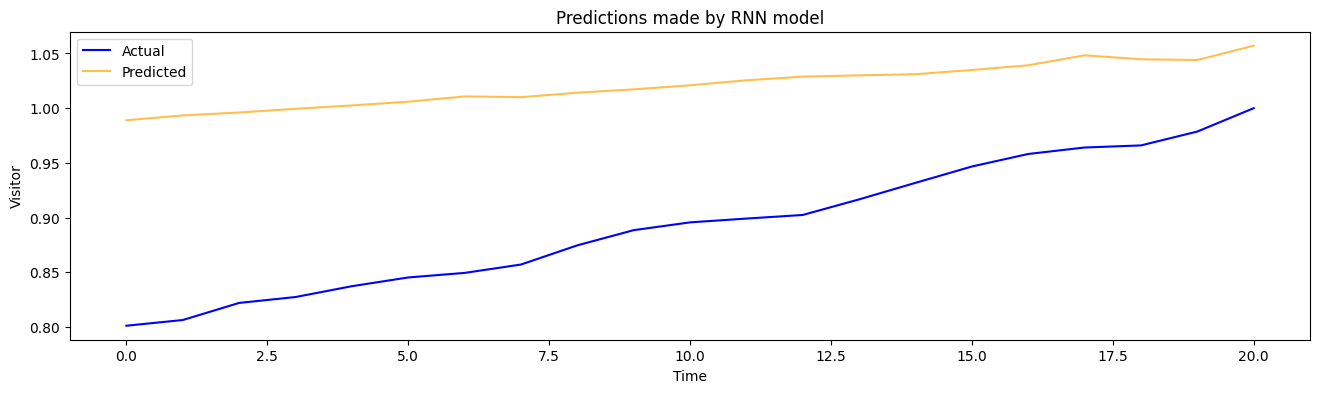

In [143]:
plotting_actual_vs_pred(y_test, predictions, "Predictions made by RNN model")

### LOSS MODEL

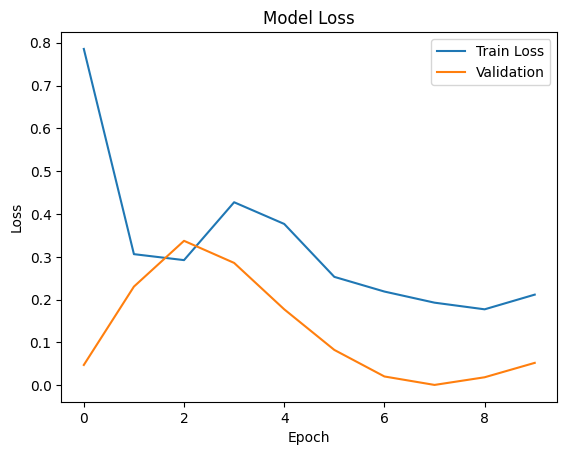

In [144]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation'], loc='upper right')
plt.show()

## **EVALUATE RNN MODEL**

### **ON TRAIN SET**

In [145]:
# Membuat prediksi visitor menggunakan X_train
y_train_pred = model.predict(X_train)

3/3 [==============================] - 0s 9ms/step


In [146]:
# Mengembalikan skala nilai visitor dari y_train
y_train_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
y_train_real = scaler.inverse_transform(y_train_copies)[:,1]
y_train_real

array([ 9348.,  9378.,  9400.,  9495.,  9523.,  9566.,  9653.,  9730.,
        9791.,  9827.,  9865.,  9902.,  9946.,  9963.,  9988., 10033.,
       10072., 10099., 10110., 10168., 10254., 10267., 10366., 10464.,
       10548., 10564., 10647., 10695., 10717., 10757., 10837., 10909.,
       10974., 11025., 11095., 11146., 11211., 11256., 11349., 11426.,
       11442., 11505., 11515., 11568., 11622., 11678., 11700., 11731.,
       11761., 11856., 11957., 11975., 12010., 12028., 12052., 12071.,
       12168., 12219., 12300., 12333., 12422., 12480., 12515., 12615.,
       12661., 12738., 12797., 12830., 12858., 12927., 12975., 13058.,
       13156., 13183., 13211., 13256., 13339., 13403., 13481., 13537.,
       13595.])

In [147]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_train_pred_copies = np.repeat(y_train_pred, X_train.shape[-1], axis=-1)
y_train_pred_real = scaler.inverse_transform(y_train_pred_copies)[:,1]
y_train_pred_real

array([10827.579 , 11864.655 , 10843.264 , 11645.033 , 12568.897 ,
        9954.125 , 12142.502 , 11789.507 , 12313.741 , 11856.309 ,
       11816.976 , 12068.531 , 12262.173 , 12226.051 , 12289.862 ,
       12441.249 , 12520.318 , 12591.385 , 12665.723 , 12245.978 ,
       12835.359 , 12286.54  , 12108.865 , 12407.012 , 12738.487 ,
       12671.701 , 12700.983 , 12815.543 , 12905.606 , 12989.544 ,
       13079.082 , 12653.192 , 13331.864 , 12808.852 , 12233.704 ,
       13064.709 , 13126.052 , 13096.821 , 13157.369 , 12867.183 ,
       13526.503 , 13230.682 , 13079.9375, 12881.443 , 13476.531 ,
       12891.77  , 12734.807 , 13473.824 , 13600.632 , 13694.674 ,
       13319.066 , 13578.793 , 13411.2705, 13907.587 , 13673.112 ,
       12641.79  , 13818.097 , 13493.381 , 12977.922 , 13604.184 ,
       14151.2705, 14189.478 , 14054.605 , 14184.558 , 14231.08  ,
       14224.844 , 14199.215 , 14305.585 , 14289.519 , 14436.937 ,
       14313.334 , 14216.051 , 14315.361 , 14366.397 , 14545.4

In [148]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_80_train = mean_squared_error(y_train_real, y_train_pred_real)
mae_80_train = mean_absolute_error(y_train_real, y_train_pred_real)
mape_80_train = mean_absolute_percentage_error(y_train_real, y_train_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_80_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_80_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_80_train, 2)}%")

Mean Absolute Error (MAE): 1738.07
Mean Squared Error (MSE): 3270250.6
Mean Absolute Percentage Error (MAPE): 0.16%


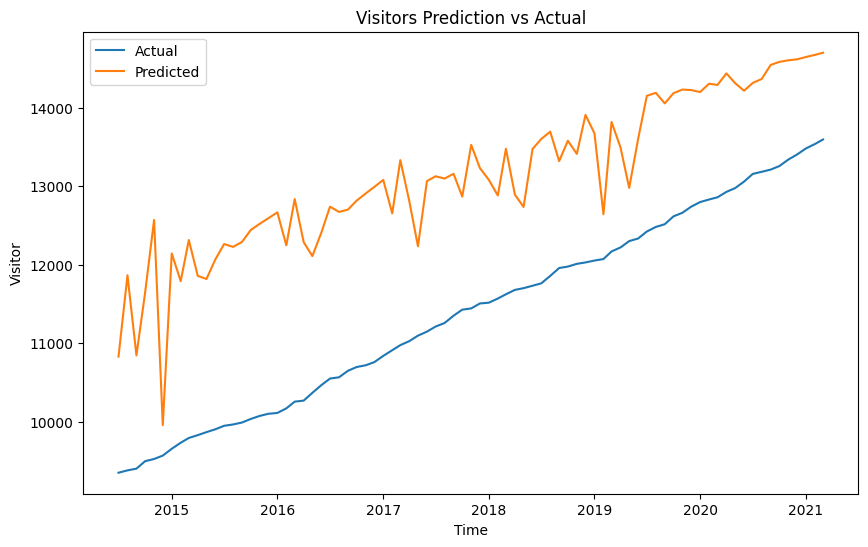

In [149]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_real, label='Actual')
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [150]:
ntt = ntt.reset_index('datetime')
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [151]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [152]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_train_pred_real sama
min_length = min(len(bulanforecast2), len(y_train_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_train_pred_real = y_train_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_train_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [153]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        10827 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        11864 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        10843 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        11645 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        12568 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │         9954 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        12142 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        11789 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        12313 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        11856 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        11816 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

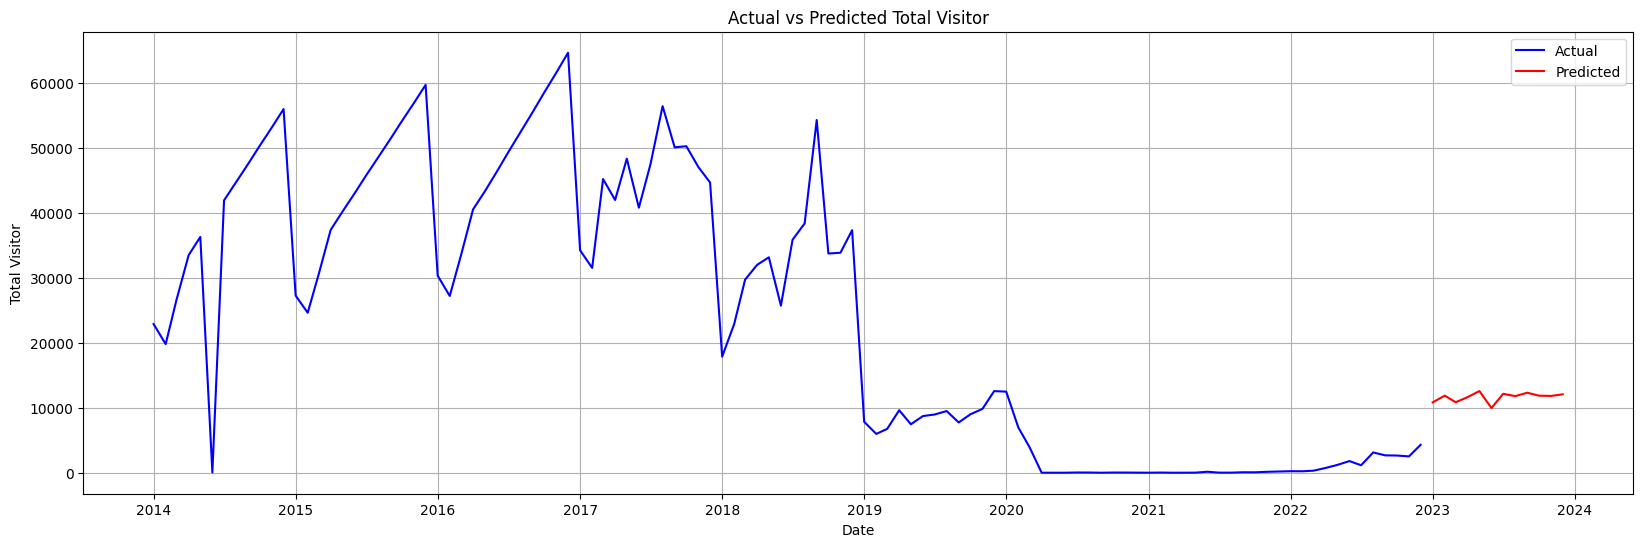

In [154]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


### **ON TEST SET**

In [155]:
# Membuat prediksi visitor menggunakan X_test
y_test_pred = model.predict(X_test)

1/1 [==============================] - 0s 156ms/step


In [156]:
# Mengembalikan skala nilai visitor dari y_test
y_test_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
y_test_real = scaler.inverse_transform(y_test_copies)[:,1]
y_test_real

array([13637., 13667., 13757., 13788., 13845., 13891., 13915., 13959.,
       14060., 14140., 14181., 14201., 14220., 14302., 14389., 14475.,
       14541., 14575., 14586., 14659., 14782.])

In [157]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_test_pred_copies = np.repeat(y_test_pred, X_test.shape[-1], axis=-1)
y_test_pred_real = scaler.inverse_transform(y_test_pred_copies)[:,1]
y_test_pred_real

array([14718.477, 14743.84 , 14759.227, 14778.71 , 14796.448, 14815.994,
       14843.884, 14840.036, 14863.577, 14881.088, 14902.515, 14928.874,
       14948.003, 14954.882, 14960.83 , 14983.   , 15007.803, 15060.246,
       15039.505, 15035.61 , 15110.795], dtype=float32)

In [158]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_80_test = mean_squared_error(y_test_real, y_test_pred_real)
mae_80_test = mean_absolute_error(y_test_real, y_test_pred_real)
mape_80_test = mean_absolute_percentage_error(y_test_real, y_test_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_80_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_80_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_80_test, 2)}%")

Mean Absolute Error (MAE): 733.49
Mean Squared Error (MSE): 590983.92
Mean Absolute Percentage Error (MAPE): 0.05%


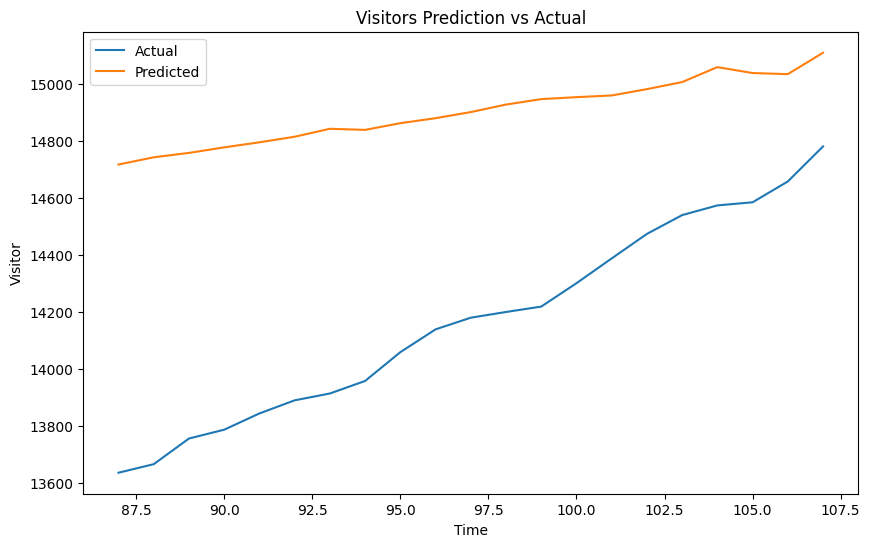

In [159]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari test set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[-y_test.shape[0]:], y_test_real, label='Actual')
plt.plot(ntt.index[-y_test.shape[0]:], y_test_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [160]:
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [161]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [162]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_test_pred_real sama
min_length = min(len(bulanforecast2), len(y_test_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_test_pred_real = y_test_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_test_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [163]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        14718 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        14743 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        14759 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        14778 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        14796 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        14815 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        14843 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        14840 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        14863 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        14881 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        14902 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

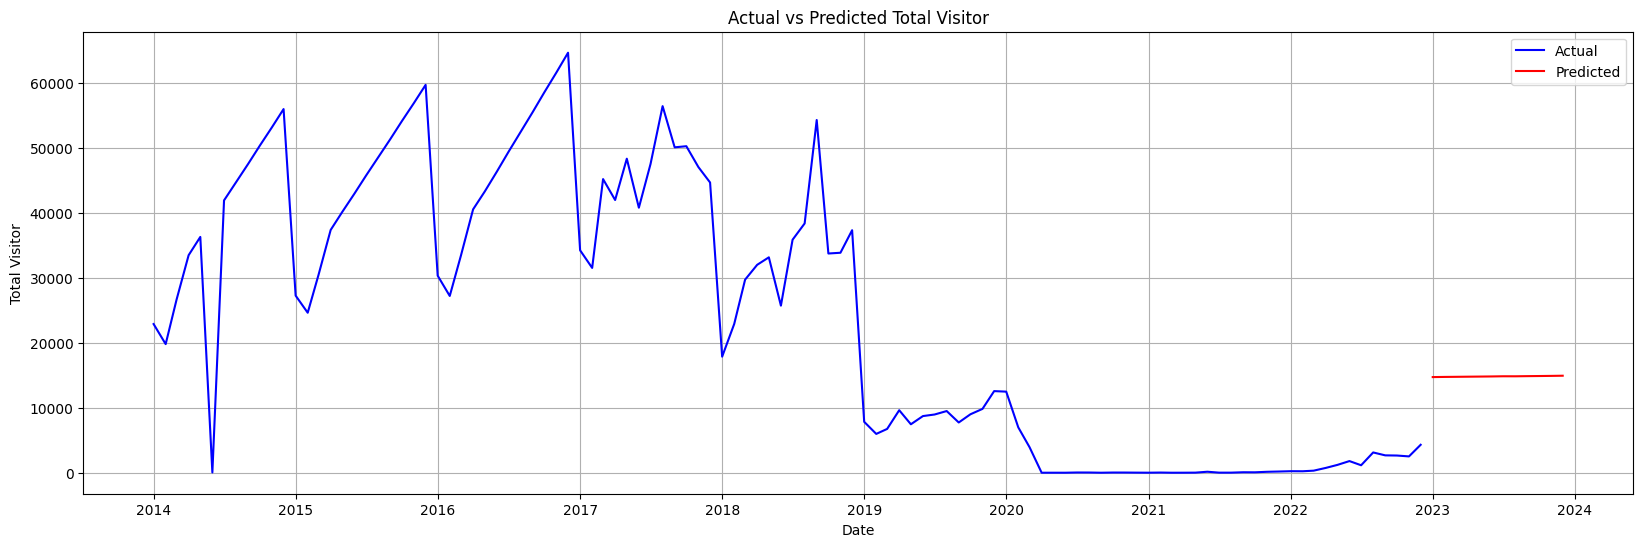

In [164]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


#Skenario Train 70 % - Tets 30 %

## Split Train Set and Test Set

In [165]:
ntt = ntt.set_index('datetime')

In [166]:
train_ratio = 0.7

In [167]:
train_size = int(train_ratio * len(sequences))
# pakai panjang sequences karena panjang dataset sudah berkurang 5 karena dibuat sequences

X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size].reshape(-1,1), labels[train_size:].reshape(-1,1)

print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (71, 6, 2)
Train Y shape: (71, 1)
Test X shape: (31, 6, 2)
Test Y shape: (31, 1)


## **RNN MODEL**

### **CREATE RNN MODEL**

In [168]:
# Inisiasi pembuatan model
model = Sequential()

# Membuat model RNN
# Activation ada relu, sigmoid, tanh
model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(1))

In [169]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 6, 40)             1720      
                                                                 
 dropout_12 (Dropout)        (None, 6, 40)             0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 6, 40)             3240      
                                                                 
 dropout_13 (Dropout)        (None, 6, 40)             0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 40)                3240      
                                                                 
 dropout_14 (Dropout)        (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

### **FIT RNN MODEL**

In [170]:
# Train model
# Pilihan optimizer adam, huber, spatial_crossentrophy
model.compile(optimizer="adam",loss="MSE")
history = model.fit(X_train, y_train, epochs=10, batch_size=1000,verbose=2,validation_split=0.2)

Epoch 1/10
1/1 - 3s - loss: 0.3680 - val_loss: 0.6685 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 0.2979 - val_loss: 0.7691 - 43ms/epoch - 43ms/step
Epoch 3/10
1/1 - 0s - loss: 0.2936 - val_loss: 0.4183 - 45ms/epoch - 45ms/step
Epoch 4/10
1/1 - 0s - loss: 0.1964 - val_loss: 0.1387 - 44ms/epoch - 44ms/step
Epoch 5/10
1/1 - 0s - loss: 0.2177 - val_loss: 0.0214 - 42ms/epoch - 42ms/step
Epoch 6/10
1/1 - 0s - loss: 0.1430 - val_loss: 0.0130 - 44ms/epoch - 44ms/step
Epoch 7/10
1/1 - 0s - loss: 0.1557 - val_loss: 0.0399 - 42ms/epoch - 42ms/step
Epoch 8/10
1/1 - 0s - loss: 0.2279 - val_loss: 0.0440 - 62ms/epoch - 62ms/step
Epoch 9/10
1/1 - 0s - loss: 0.1852 - val_loss: 0.0350 - 46ms/epoch - 46ms/step
Epoch 10/10
1/1 - 0s - loss: 0.1206 - val_loss: 0.0235 - 49ms/epoch - 49ms/step


In [171]:
# Melakukan prediksi pada test set
predictions = model.predict(X_test)

1/1 [==============================] - 0s 374ms/step


In [172]:
# Evaluasi Nilai R^2
from sklearn.metrics import r2_score #ini nanti dipindah ke atas biar ngga bingung
score = r2_score(y_test,predictions)
print("R-Squared Score of RNN model",score)

R-Squared Score of RNN model 0.4027936903180852


In [173]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

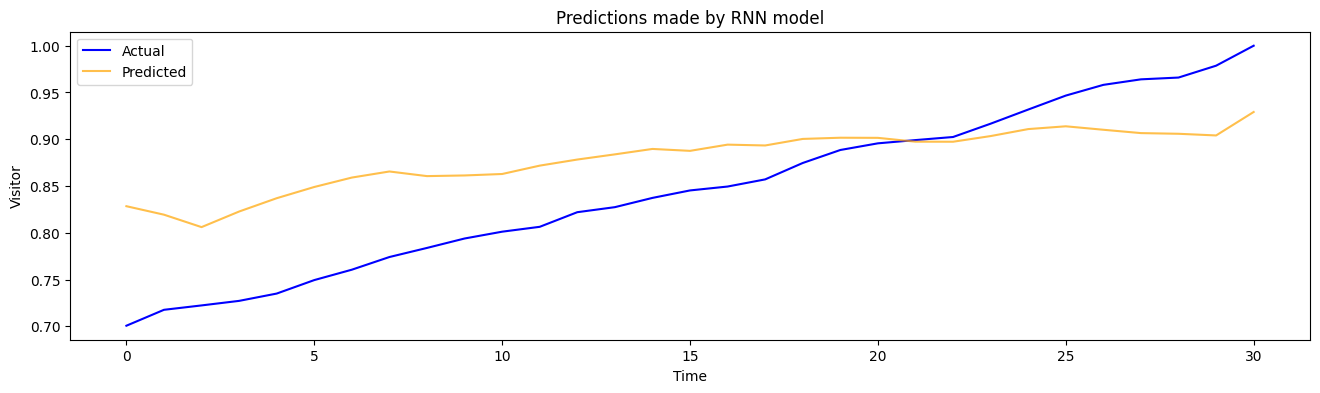

In [174]:
plotting_actual_vs_pred(y_test, predictions, "Predictions made by RNN model")

### LOSS MODEL

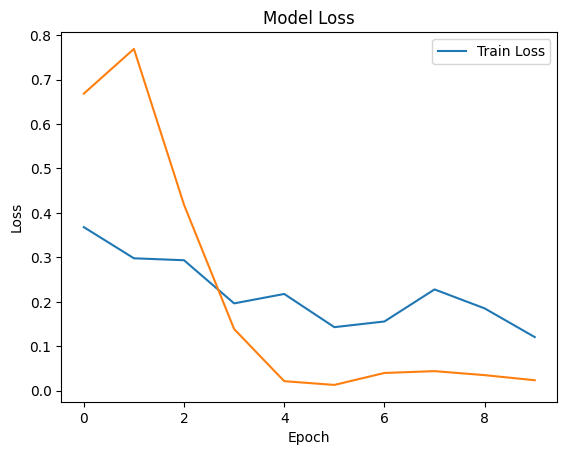

In [175]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss'], loc='upper right')
plt.show()

## **EVALUATE RNN MODEL**

### **ON TRAIN SET**

In [176]:
# Membuat prediksi visitor menggunakan X_train
y_train_pred = model.predict(X_train)

3/3 [==============================] - 0s 6ms/step


In [177]:
# Mengembalikan skala nilai visitor dari y_train
y_train_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
y_train_real = scaler.inverse_transform(y_train_copies)[:,1]
y_train_real

array([ 9348.,  9378.,  9400.,  9495.,  9523.,  9566.,  9653.,  9730.,
        9791.,  9827.,  9865.,  9902.,  9946.,  9963.,  9988., 10033.,
       10072., 10099., 10110., 10168., 10254., 10267., 10366., 10464.,
       10548., 10564., 10647., 10695., 10717., 10757., 10837., 10909.,
       10974., 11025., 11095., 11146., 11211., 11256., 11349., 11426.,
       11442., 11505., 11515., 11568., 11622., 11678., 11700., 11731.,
       11761., 11856., 11957., 11975., 12010., 12028., 12052., 12071.,
       12168., 12219., 12300., 12333., 12422., 12480., 12515., 12615.,
       12661., 12738., 12797., 12830., 12858., 12927., 12975.])

In [178]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_train_pred_copies = np.repeat(y_train_pred, X_train.shape[-1], axis=-1)
y_train_pred_real = scaler.inverse_transform(y_train_pred_copies)[:,1]
y_train_pred_real

array([ 8713.179 , 10033.562 , 10379.397 ,  6653.944 ,  9474.677 ,
       10606.427 ,  9425.811 ,  9302.21  ,  9610.702 , 10358.989 ,
        8658.019 ,  8668.055 ,  9924.036 , 10420.6875, 10252.372 ,
       10128.606 , 10128.568 , 10122.503 , 10101.813 ,  9948.024 ,
       10201.674 , 10886.162 ,  9267.763 ,  9279.24  , 10549.562 ,
       10925.19  , 10687.413 , 10524.936 , 10609.443 , 10627.294 ,
       10617.956 , 10468.926 , 10756.66  , 11363.336 ,  9719.174 ,
        9936.273 , 11838.982 , 11399.585 , 11553.781 , 10907.518 ,
       11222.54  , 11851.074 , 11184.434 , 11234.315 , 11633.686 ,
       12077.823 , 10774.745 , 11574.44  , 12944.524 , 12845.035 ,
       12652.245 , 11961.264 , 12391.122 , 12454.21  , 13226.6455,
       11738.378 , 12042.384 , 13425.264 , 11762.501 , 12073.896 ,
       13322.76  , 13579.982 , 13443.866 , 13518.753 , 13627.296 ,
       13679.262 , 13534.931 , 13640.623 , 13730.407 , 14009.885 ,
       14074.876 ], dtype=float32)

In [179]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_70_train = mean_squared_error(y_train_real, y_train_pred_real)
mae_70_train = mean_absolute_error(y_train_real, y_train_pred_real)
mape_70_train = mean_absolute_percentage_error(y_train_real, y_train_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_70_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_70_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_70_train, 2)}%")

Mean Absolute Error (MAE): 571.95
Mean Squared Error (MSE): 567485.16
Mean Absolute Percentage Error (MAPE): 0.05%


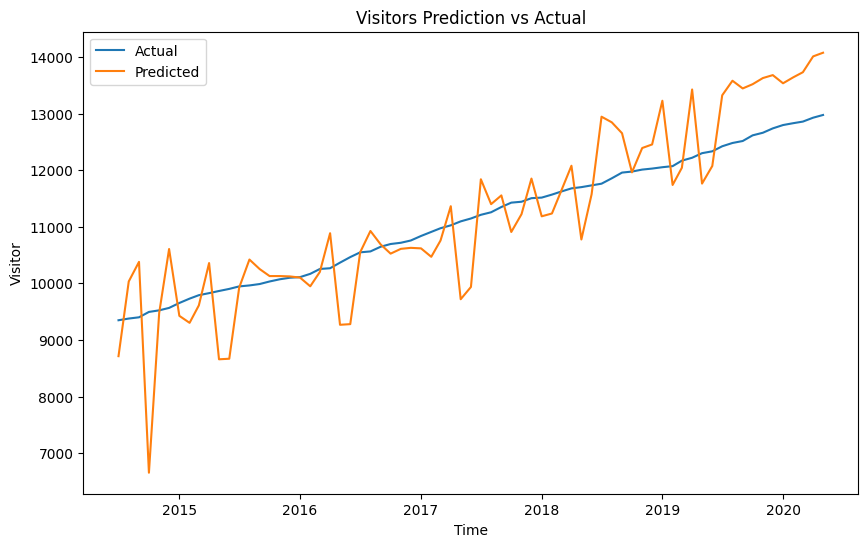

In [180]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_real, label='Actual')
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [181]:
ntt = ntt.reset_index('datetime')
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [182]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [183]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_train_pred_real sama
min_length = min(len(bulanforecast2), len(y_train_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_train_pred_real = y_train_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_train_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [184]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │         8713 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        10033 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        10379 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │         6653 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │         9474 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        10606 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │         9425 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │         9302 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │         9610 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        10358 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │         8658 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

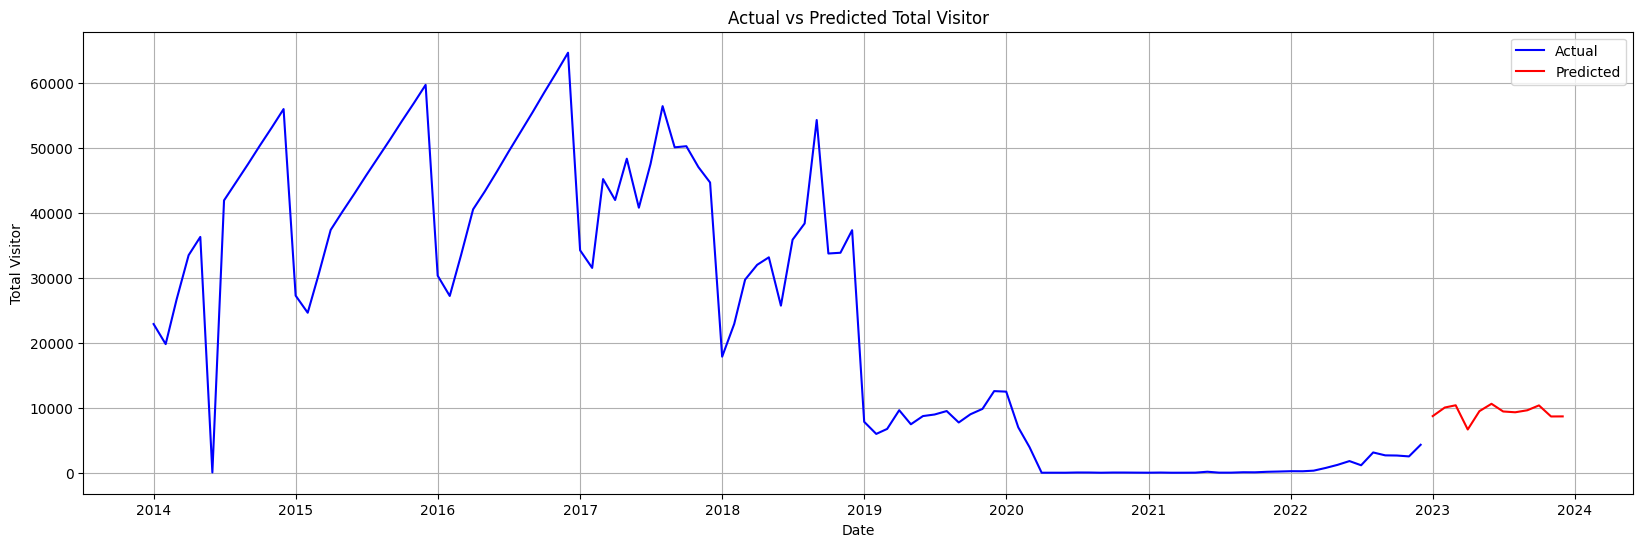

In [185]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


### **ON TEST SET**

In [186]:
# Membuat prediksi visitor menggunakan X_test
y_test_pred = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [187]:
# Mengembalikan skala nilai visitor dari y_test
y_test_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
y_test_real = scaler.inverse_transform(y_test_copies)[:,1]
y_test_real

array([13058., 13156., 13183., 13211., 13256., 13339., 13403., 13481.,
       13537., 13595., 13637., 13667., 13757., 13788., 13845., 13891.,
       13915., 13959., 14060., 14140., 14181., 14201., 14220., 14302.,
       14389., 14475., 14541., 14575., 14586., 14659., 14782.])

In [188]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_test_pred_copies = np.repeat(y_test_pred, X_test.shape[-1], axis=-1)
y_test_pred_real = scaler.inverse_transform(y_test_pred_copies)[:,1]
y_test_pred_real

array([13793.901, 13741.694, 13665.124, 13761.128, 13843.074, 13912.228,
       13970.228, 14007.674, 13979.191, 13983.229, 13992.195, 14043.715,
       14081.162, 14113.09 , 14146.474, 14134.688, 14172.98 , 14167.852,
       14208.136, 14215.535, 14214.751, 14191.19 , 14190.841, 14225.733,
       14268.715, 14285.875, 14264.573, 14244.016, 14239.832, 14229.55 ,
       14374.051], dtype=float32)

In [189]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_70_test = mean_squared_error(y_test_real, y_test_pred_real)
mae_70_test = mean_absolute_error(y_test_real, y_test_pred_real)
mape_70_test = mean_absolute_percentage_error(y_test_real, y_test_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_70_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_70_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_70_test, 2)}%")

Mean Absolute Error (MAE): 332.41
Mean Squared Error (MSE): 145807.26
Mean Absolute Percentage Error (MAPE): 0.02%


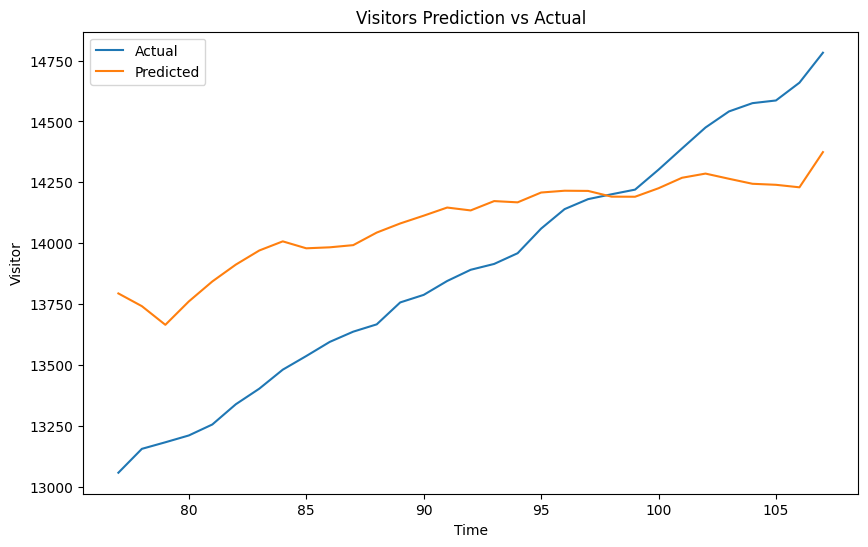

In [190]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[-y_test.shape[0]:], y_test_real, label='Actual')
plt.plot(ntt.index[-y_test.shape[0]:], y_test_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [191]:
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [192]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [193]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_test_pred_real sama
min_length = min(len(bulanforecast2), len(y_test_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_test_pred_real = y_test_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_test_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [194]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        13793 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        13741 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        13665 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        13761 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        13843 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        13912 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        13970 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        14007 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        13979 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        13983 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        13992 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

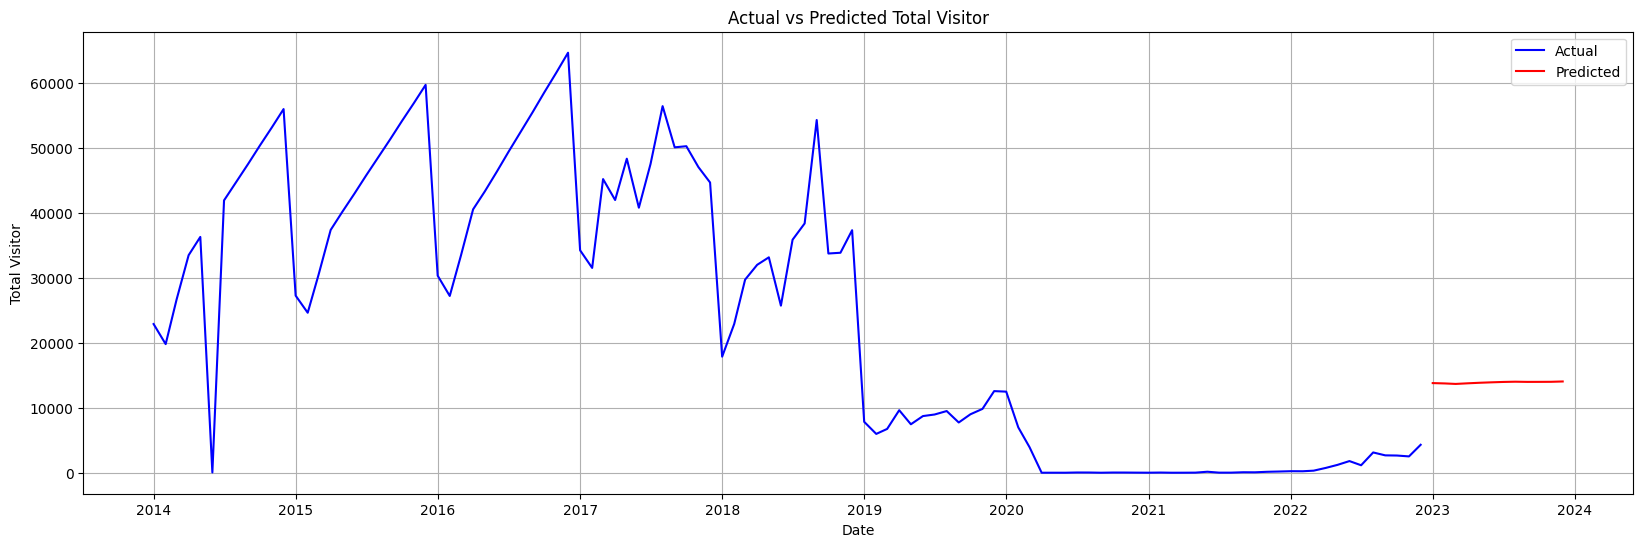

In [195]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


#Skenario Train 60 % - Tets 40 %

## Split Train Set and Test Set

In [196]:
ntt = ntt.set_index('datetime')

In [197]:
train_ratio = 0.6

In [198]:
train_size = int(train_ratio * len(sequences))
# pakai panjang sequences karena panjang dataset sudah berkurang 5 karena dibuat sequences

X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size].reshape(-1,1), labels[train_size:].reshape(-1,1)

print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (61, 6, 2)
Train Y shape: (61, 1)
Test X shape: (41, 6, 2)
Test Y shape: (41, 1)


## **RNN MODEL**

### **CREATE RNN MODEL**

In [199]:
# Inisiasi pembuatan model
model = Sequential()

# Membuat model RNN
# Activation ada relu, sigmoid, tanh
model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
model.add(Dropout(0.15))
model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(1))

In [200]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 6, 40)             1720      
                                                                 
 dropout_15 (Dropout)        (None, 6, 40)             0         
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 6, 40)             3240      
                                                                 
 dropout_16 (Dropout)        (None, 6, 40)             0         
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 40)                3240      
                                                                 
 dropout_17 (Dropout)        (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

### **FIT RNN MODEL**

In [201]:
# Train model
# Pilihan optimizer adam, huber, spatial_crossentrophy
model.compile(optimizer="adam",loss="MSE")
history = model.fit(X_train, y_train, epochs=10, batch_size=1000,verbose=2,validation_split=0.2)

Epoch 1/10
1/1 - 4s - loss: 2.5188 - val_loss: 0.4144 - 4s/epoch - 4s/step
Epoch 2/10
1/1 - 0s - loss: 0.9937 - val_loss: 0.0886 - 63ms/epoch - 63ms/step
Epoch 3/10
1/1 - 0s - loss: 0.2903 - val_loss: 0.3487 - 79ms/epoch - 79ms/step
Epoch 4/10
1/1 - 0s - loss: 0.5482 - val_loss: 0.6167 - 68ms/epoch - 68ms/step
Epoch 5/10
1/1 - 0s - loss: 0.5436 - val_loss: 0.7046 - 69ms/epoch - 69ms/step
Epoch 6/10
1/1 - 0s - loss: 0.5693 - val_loss: 0.6236 - 76ms/epoch - 76ms/step
Epoch 7/10
1/1 - 0s - loss: 0.5858 - val_loss: 0.4505 - 83ms/epoch - 83ms/step
Epoch 8/10
1/1 - 0s - loss: 0.4739 - val_loss: 0.2554 - 66ms/epoch - 66ms/step
Epoch 9/10
1/1 - 0s - loss: 0.4772 - val_loss: 0.1034 - 62ms/epoch - 62ms/step
Epoch 10/10
1/1 - 0s - loss: 0.2898 - val_loss: 0.0290 - 76ms/epoch - 76ms/step


In [202]:
# Melakukan prediksi pada test set
predictions = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [203]:
# Evaluasi Nilai R^2
from sklearn.metrics import r2_score #ini nanti dipindah ke atas biar ngga bingung
score = r2_score(y_test,predictions)
print("R-Squared Score of RNN model",score)

R-Squared Score of RNN model 0.5102778345100667


In [204]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual')
    plt.plot(y_pred, alpha=0.7, color='orange',
    label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Visitor')
    plt.legend()
    plt.show()

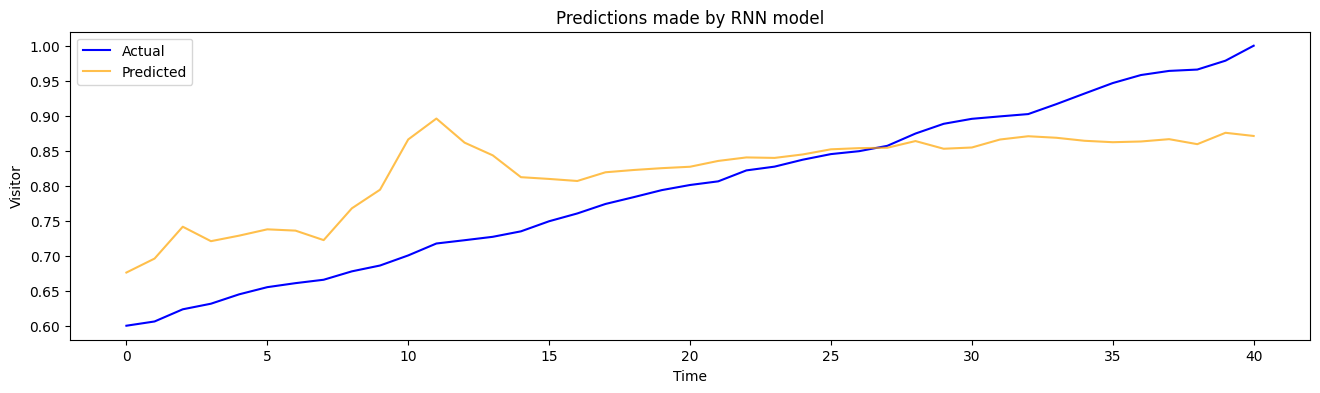

In [205]:
plotting_actual_vs_pred(y_test, predictions, "Predictions made by RNN model")

### LOSS MODEL

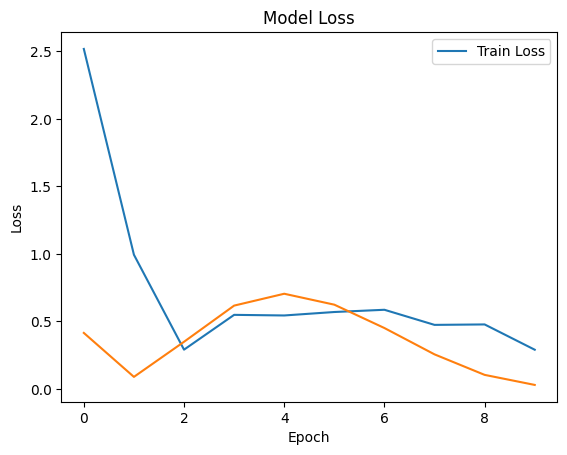

In [206]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss'], loc='upper right')
plt.show()

## **EVALUATE RNN MODEL**

### **ON TRAIN SET**

In [207]:
# Membuat prediksi visitor menggunakan X_train
y_train_pred = model.predict(X_train)

2/2 [==============================] - 0s 8ms/step


In [208]:
# Mengembalikan skala nilai visitor dari y_train
y_train_copies = np.repeat(y_train.reshape(-1, 1), X_train.shape[-1], axis=-1)
y_train_real = scaler.inverse_transform(y_train_copies)[:,1]
y_train_real

array([ 9348.,  9378.,  9400.,  9495.,  9523.,  9566.,  9653.,  9730.,
        9791.,  9827.,  9865.,  9902.,  9946.,  9963.,  9988., 10033.,
       10072., 10099., 10110., 10168., 10254., 10267., 10366., 10464.,
       10548., 10564., 10647., 10695., 10717., 10757., 10837., 10909.,
       10974., 11025., 11095., 11146., 11211., 11256., 11349., 11426.,
       11442., 11505., 11515., 11568., 11622., 11678., 11700., 11731.,
       11761., 11856., 11957., 11975., 12010., 12028., 12052., 12071.,
       12168., 12219., 12300., 12333., 12422.])

In [209]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_train_pred_copies = np.repeat(y_train_pred, X_train.shape[-1], axis=-1)
y_train_pred_real = scaler.inverse_transform(y_train_pred_copies)[:,1]
y_train_pred_real

array([10730.396 ,  9922.791 ,  9110.917 , 10225.167 , 12627.834 ,
        5357.427 , 10159.002 , 10424.137 , 10818.065 , 10794.123 ,
       10847.445 , 12802.395 , 10543.235 ,  9771.161 ,  9914.885 ,
       10283.713 , 10270.66  , 10251.479 , 10254.875 , 10550.881 ,
       10851.148 , 10793.681 , 10890.725 , 12657.516 , 10764.076 ,
       10070.019 , 10261.489 , 10502.929 , 10476.301 , 10473.978 ,
       10472.929 , 10721.199 , 10943.858 , 10859.238 , 11066.006 ,
       12656.287 , 11187.164 , 10616.571 , 11154.336 , 10914.3955,
       11463.553 , 10944.159 , 11071.06  , 11930.797 , 11943.315 ,
       12106.802 , 12591.424 , 13371.937 , 11647.671 , 11743.152 ,
       11868.539 , 11800.    , 11959.321 , 11602.122 , 11743.609 ,
       12261.744 , 13674.763 , 13084.845 , 13849.134 , 14800.833 ,
       13195.602 ], dtype=float32)

In [210]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_60_train = mean_squared_error(y_train_real, y_train_pred_real)
mae_60_train = mean_absolute_error(y_train_real, y_train_pred_real)
mape_60_train = mean_absolute_percentage_error(y_train_real, y_train_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_60_train, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_60_train, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_60_train, 2)}%")

Mean Absolute Error (MAE): 687.52
Mean Squared Error (MSE): 1137744.26
Mean Absolute Percentage Error (MAPE): 0.07%


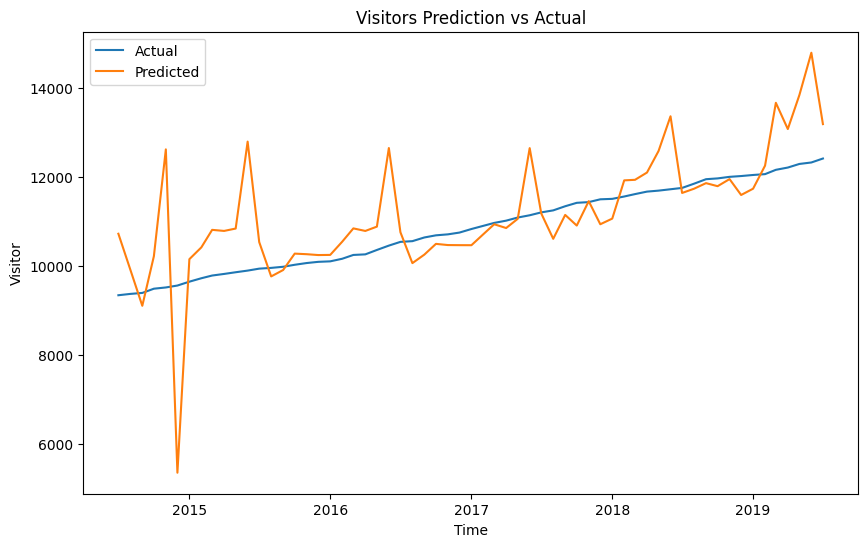

In [211]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_real, label='Actual')
plt.plot(ntt.index[sequence_length:y_train.shape[0]+sequence_length], y_train_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [212]:
ntt = ntt.reset_index('datetime')
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [213]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [214]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_train_pred_real sama
min_length = min(len(bulanforecast2), len(y_train_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_train_pred_real = y_train_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_train_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [215]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        10730 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │         9922 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │         9110 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        10225 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        12627 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │         5357 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        10159 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        10424 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        10818 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        10794 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        10847 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

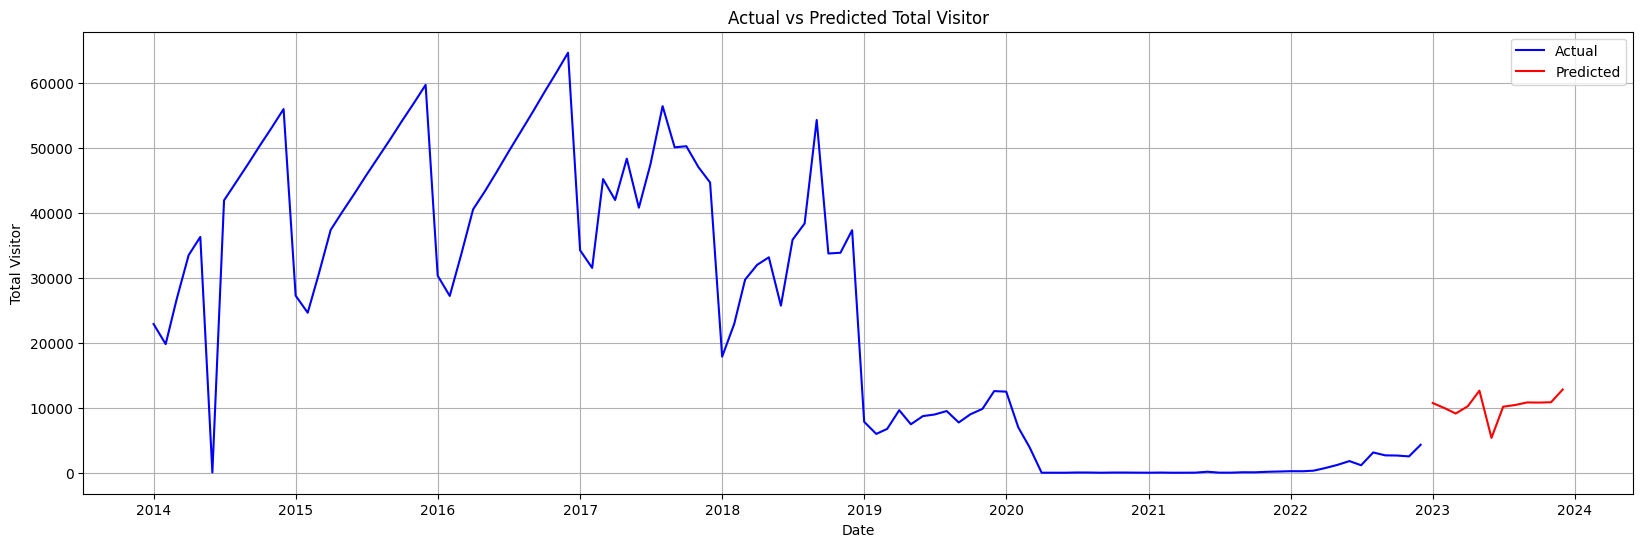

In [216]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


### **ON TEST SET**

In [217]:
# Membuat prediksi visitor menggunakan X_test
y_test_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [218]:
# Mengembalikan skala nilai visitor dari y_test
y_test_copies = np.repeat(y_test.reshape(-1, 1), X_test.shape[-1], axis=-1)
y_test_real = scaler.inverse_transform(y_test_copies)[:,1]
y_test_real

array([12480., 12515., 12615., 12661., 12738., 12797., 12830., 12858.,
       12927., 12975., 13058., 13156., 13183., 13211., 13256., 13339.,
       13403., 13481., 13537., 13595., 13637., 13667., 13757., 13788.,
       13845., 13891., 13915., 13959., 14060., 14140., 14181., 14201.,
       14220., 14302., 14389., 14475., 14541., 14575., 14586., 14659.,
       14782.])

In [219]:
# Mengembalikan skala nilai visitor dari y_train_pred
y_test_pred_copies = np.repeat(y_test_pred, X_test.shape[-1], axis=-1)
y_test_pred_real = scaler.inverse_transform(y_test_pred_copies)[:,1]
y_test_pred_real

array([12917.18 , 13032.085, 13293.866, 13175.146, 13220.515, 13272.462,
       13261.897, 13183.789, 13445.145, 13598.144, 14011.33 , 14183.304,
       13985.191, 13880.741, 13701.238, 13686.82 , 13669.955, 13741.559,
       13760.292, 13775.405, 13787.012, 13834.863, 13863.626, 13859.704,
       13888.103, 13930.363, 13939.95 , 13943.113, 13998.251, 13935.   ,
       13945.258, 14010.969, 14037.832, 14025.232, 14000.449, 13988.773,
       13994.691, 14013.755, 13972.651, 14066.173, 14040.045],
      dtype=float32)

In [220]:
# Menghitung nilai ERROR dari hasil prediksi visitor terhadap data visitor asli dari train set
mse_60_test = mean_squared_error(y_test_real, y_test_pred_real)
mae_60_test = mean_absolute_error(y_test_real, y_test_pred_real)
mape_60_test = mean_absolute_percentage_error(y_test_real, y_test_pred_real)

print(f"Mean Absolute Error (MAE): {round(mae_60_test, 2)}")
print(f"Mean Squared Error (MSE): {round(mse_60_test, 2)}")
print(f"Mean Absolute Percentage Error (MAPE): {round(mape_60_test, 2)}%")

Mean Absolute Error (MAE): 387.38
Mean Squared Error (MSE): 214313.19
Mean Absolute Percentage Error (MAPE): 0.03%


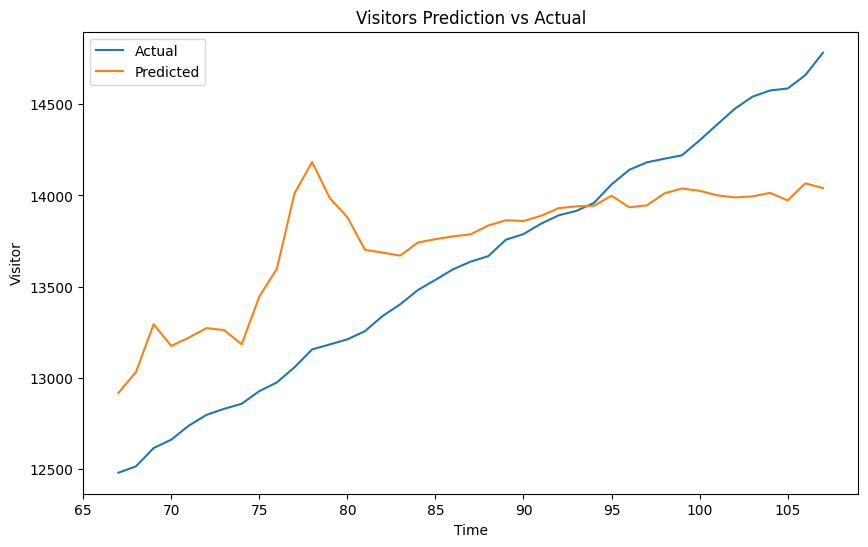

In [221]:
# Melakukan plotting hasil prediksi visitor terhadap data visitor asli dari train set
plt.figure(figsize=(10, 6))
plt.plot(ntt.index[-y_test.shape[0]:], y_test_real, label='Actual')
plt.plot(ntt.index[-y_test.shape[0]:], y_test_pred_real, label='Predicted')
plt.title('Visitors Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()
plt.show()

In [222]:
train_datetime = pd.to_datetime(ntt['datetime'])
print(train_datetime)

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]


In [223]:
# Predict for 12 month afterwards
n_past = 1
n_bulanprediksi = 12
bulanprediksi2 = pd.date_range(list(train_datetime)[-n_past], periods=n_bulanprediksi, freq='M').tolist()
print(bulanprediksi2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [224]:
import matplotlib.dates as mdates

bulanforecast2 = []

for time_i in bulanprediksi2:
    bulanforecast2.append(time_i.date())

# Generate the forecast dates from January 2023 to December 2023
bulanforecast_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
bulanforecast_2 = pd.to_datetime(bulanforecast_2, format='%Y-%m-%d')

# Memastikan panjang forecast_dates dan y_test_pred_real sama
min_length = min(len(bulanforecast2), len(y_test_pred_real))
bulanforecast2 = bulanforecast2[:min_length]
y_test_pred_real = y_test_pred_real[:min_length]

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_test_pred_real, columns=['total_visitor'], index=bulanforecast_2)

ntt_rnn_copy = ntt.copy()
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%m/%d/%Y')
ntt_rnn_copy['datetime'] = pd.to_datetime(ntt_rnn_copy['datetime'], format='%Y-%m-%d')
ntt_rnn_copy.set_index("datetime", inplace=True)


In [225]:
from tabulate import tabulate

# Create a list of forecast dates and prediction values
data = list(zip(df_test.index, map(int, df_test['total_visitor'])))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)


╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │        12917 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │        13032 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │        13293 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │        13175 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │        13220 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │        13272 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │        13261 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │        13183 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │        13445 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │        13598 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │        14011 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

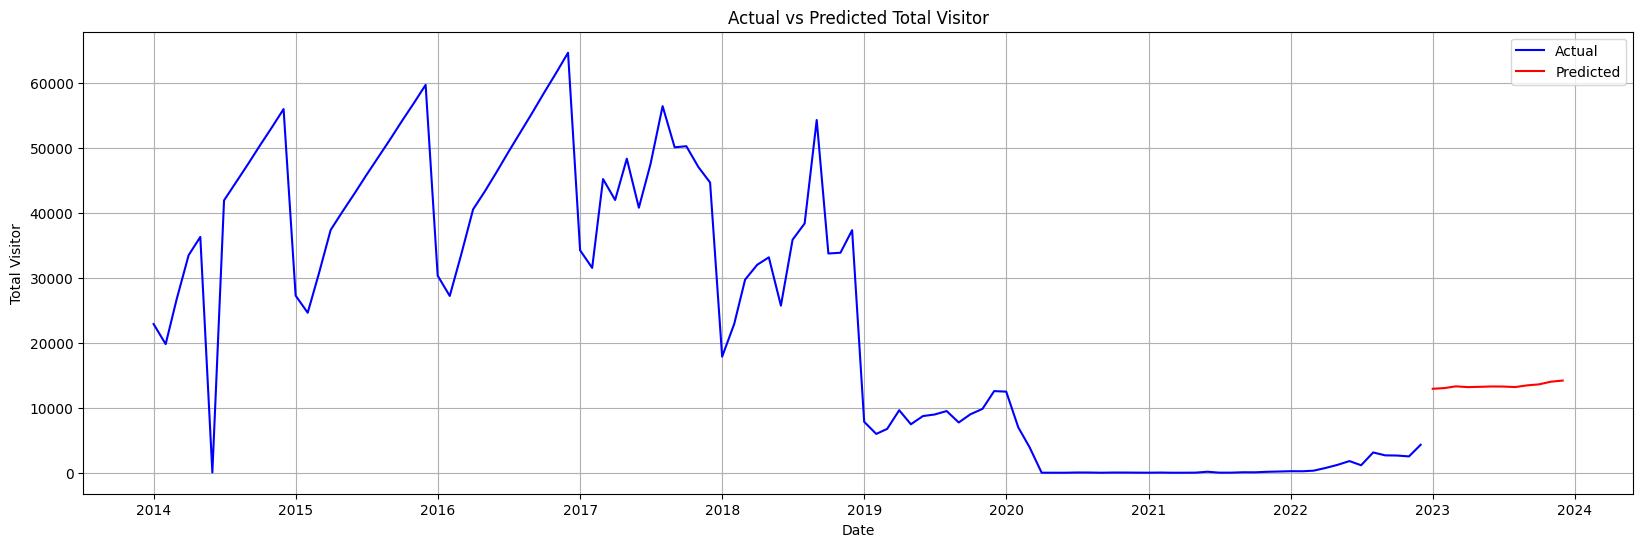

In [226]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(20, 6))
plt.plot(ntt_rnn_copy.index, ntt_rnn_copy['total_visitor'], color='blue', label='Actual')
plt.plot(df_test.index, df_test['total_visitor'], color='red', label='Predicted')
plt.title('Actual vs Predicted Total Visitor')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


#Conclusion

In [227]:
# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN Train 80',
        'MSE': mse_80_train,
        'MAE': mae_80_train,
        'MAPE (%)': mape_80_train
    },
    {
    'Scenario': 'Scenario 1',
        'Model': 'RNN Test 80',
        'MSE': mse_80_test,
        'MAE': mae_80_test,
        'MAPE (%)': mape_80_test
    },
   {
        'Scenario': 'Scenario 2',
        'Model': 'RNN Train 70',
        'MSE': mse_70_train,
        'MAE': mae_70_train,
        'MAPE (%)': mape_70_train
    },
    {
    'Scenario': 'Scenario 2',
        'Model': 'RNN Test 70',
        'MSE': mse_70_test,
        'MAE': mae_70_test,
        'MAPE (%)': mape_70_test
    },
     {
        'Scenario': 'Scenario 3',
        'Model': 'RNN Train 60',
        'MSE': mse_60_train,
        'MAE': mae_60_train,
        'MAPE (%)': mape_60_train
    },
    {
    'Scenario': 'Scenario 3',
        'Model': 'RNN Test 60',
        'MSE': mse_60_test,
        'MAE': mae_60_test,
        'MAPE (%)': mape_60_test
    },
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)



╒════════════╤══════════════╤══════════════════╤══════════╤════════════╕
│ Scenario   │ Model        │              MSE │      MAE │   MAPE (%) │
╞════════════╪══════════════╪══════════════════╪══════════╪════════════╡
│ Scenario 1 │ RNN Train 80 │      3.27025e+06 │ 1738.07  │  0.15755   │
├────────────┼──────────────┼──────────────────┼──────────┼────────────┤
│ Scenario 1 │ RNN Test 80  │ 590984           │  733.493 │  0.0521801 │
├────────────┼──────────────┼──────────────────┼──────────┼────────────┤
│ Scenario 2 │ RNN Train 70 │ 567485           │  571.946 │  0.0514201 │
├────────────┼──────────────┼──────────────────┼──────────┼────────────┤
│ Scenario 2 │ RNN Test 70  │ 145807           │  332.409 │  0.0242785 │
├────────────┼──────────────┼──────────────────┼──────────┼────────────┤
│ Scenario 3 │ RNN Train 60 │      1.13774e+06 │  687.524 │  0.0651035 │
├────────────┼──────────────┼──────────────────┼──────────┼────────────┤
│ Scenario 3 │ RNN Test 60  │ 214313           │  3